# outliers dections and remove(IQR)

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn .linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\placement (2).csv")

In [4]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

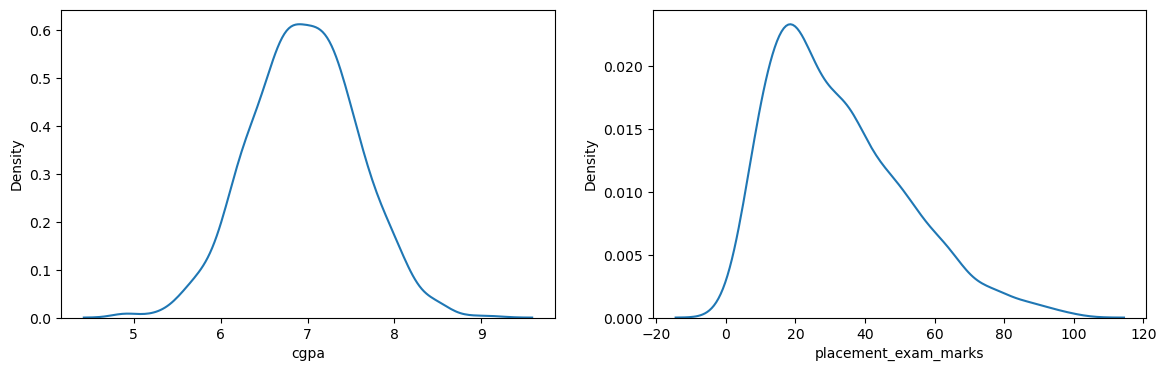

In [5]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data["cgpa"])
plt.subplot(122)
sns.kdeplot(data["placement_exam_marks"])

In [6]:
data["placement_exam_marks"].skew()

0.8356419499466834

# use the IQR in placement_exam_marks

<Axes: ylabel='placement_exam_marks'>

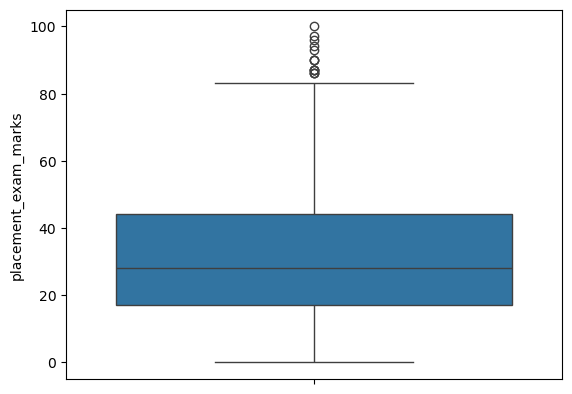

In [8]:
sns.boxplot(data["placement_exam_marks"])

# find quantiles 25 and 75 

In [10]:
q1=data["placement_exam_marks"].quantile(.25)
q3=data["placement_exam_marks"].quantile(.75)

# find IQR

In [12]:
IQR=q3-q1

In [13]:
IQR

27.0

# minimum

In [15]:
min_val=q1-1.5*IQR

In [16]:
min_val

-23.5

In [17]:
max_val=q3+1.5*IQR

In [18]:
max_val

84.5

# find the outliers 

In [20]:
data[(data["placement_exam_marks"]>max_val) | (data["placement_exam_marks"]<min_val)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# trimming the value 

In [22]:
trimming=data[(data["placement_exam_marks"]<max_val) & (data["placement_exam_marks"]>min_val)]

# distributions 

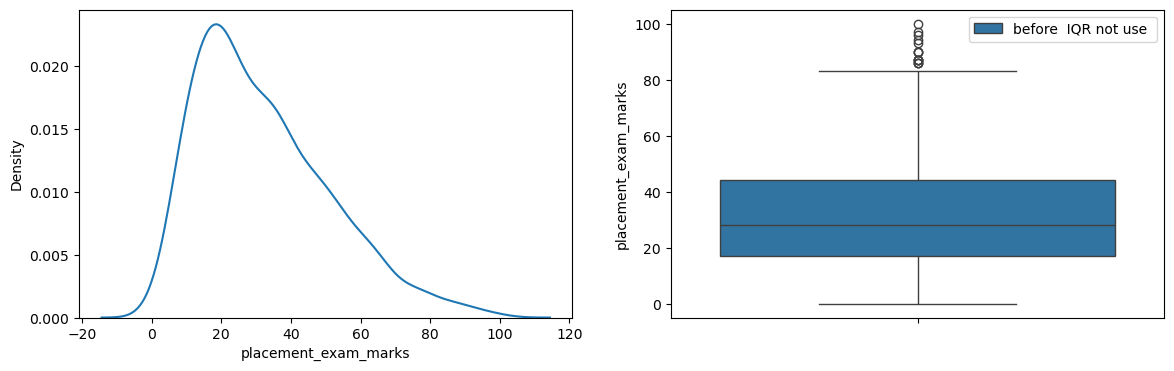

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(data["placement_exam_marks"],label="before the IQR not use  ")
plt.subplot(1,2,2)
sns.boxplot(data["placement_exam_marks"],label="before  IQR not use ")
plt.legend()




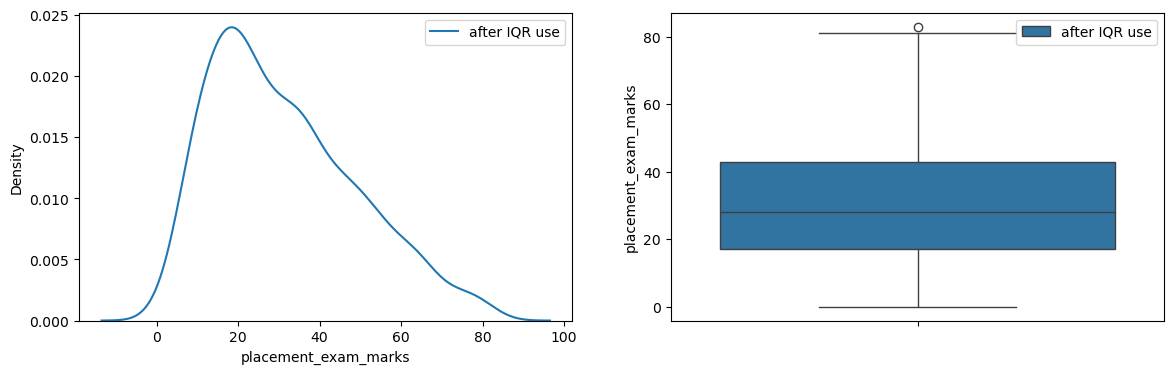

In [82]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(trimming["placement_exam_marks"],label="after IQR use")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(trimming["placement_exam_marks"],label="after IQR use")
plt.legend()

# capping the value 

In [86]:
data["placement_exam_marks"]=np.where(
data["placement_exam_marks"]>max_val,
    max_val,
    np.where(
    data["placement_exam_marks"]<min_val,
        min_val,
        data["placement_exam_marks"]))

In [88]:
data.head()

,cgpa,placement_exam_marks,placed,placement_exam_marks_trimming
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0


In [90]:
# check the outliers after using capping 

In [97]:
data[(data["placement_exam_marks"]>max_val) |(data["placement_exam_marks"]<min_val)]

,cgpa,placement_exam_marks,placed,placement_exam_marks_trimming


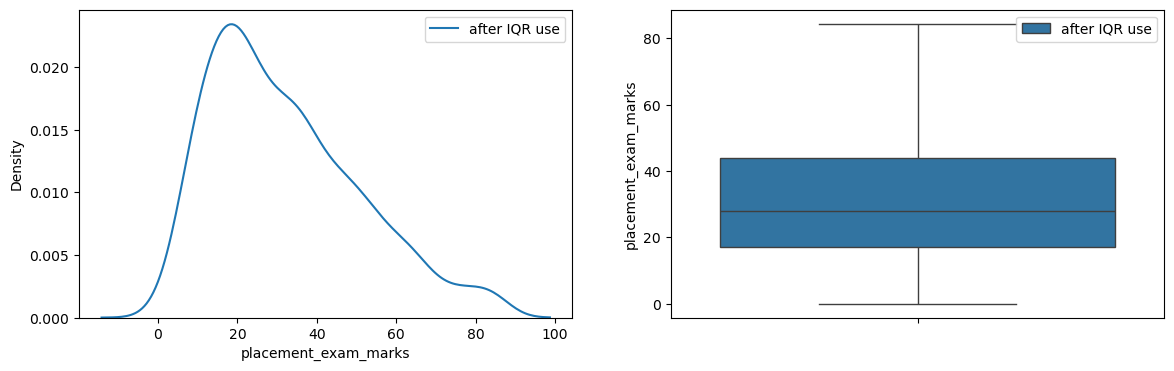

In [99]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(data["placement_exam_marks"],label="after IQR use")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data["placement_exam_marks"],label="after IQR use")
plt.legend()